In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Maps II





In [3]:
class LogisticMap:
    
    def __init__(self, x, r, n_steps = 1):
        
        self.x = x
        self.r = r
        self.n_steps = n_steps
    
    
    def get_data(self, return_initial_state = True):
        x_ = self.x
        self.process = [x_]

        for i in range(self.n_steps):
            x_ = self.r * x_ * (1 - x_)
            self.process.append(x_)
            
        if not return_initial_state:
            self.process = self.process[1:]

        return np.array(self.process)

In [4]:
def correlation_plot(map_obj, alpha = .5):
    
    x_n = map_obj.get_data()[:-1]
    x_n_plus_1 = map_obj.get_data()[1:]
    
    plt.figure(figsize = (7, 5))
    plt.plot(x_n, x_n, linewidth = 1.5, color = 'gray', alpha = alpha)
    plt.scatter(x_n, x_n_plus_1, alpha = alpha, color = '#c0539e',
                label = f'$R = {map_obj.r}; x_0 = {map_obj.x}$')
    plt.legend()
    plt.title('Correlation plot')
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    plt.show()

In [5]:
def time_domain_plot(map_obj, alpha = .5, start = 0):
    
    x_n = map_obj.get_data()[start:]
    
    plt.figure(figsize = (15, 5))
    plt.plot(x_n, alpha = alpha,
            label = f'$R = {map_obj.r}; x_0 = {map_obj.x}$',
            marker = 'o', markerfacecolor = 'darkblue', linewidth = 1.5, color = 'gray')
    plt.legend()
    plt.title('Time domain plot')
    plt.xlabel('$n$')
    plt.ylabel('$x_n$')
    plt.show()

Maps can be visualized in many different ways.

One of these ways is the **(First) return map** aka **correlation plot** or **coweb diagram**.

In [154]:
some_map = LogisticMap(.5, 3.41, 500)

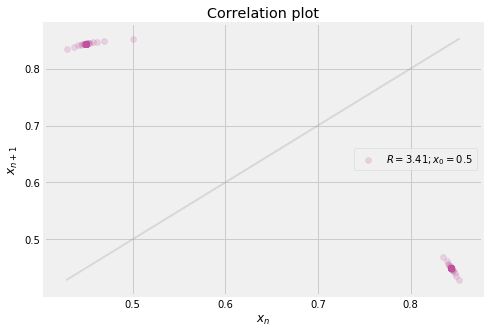

In [157]:
correlation_plot(some_map, alpha = .2)

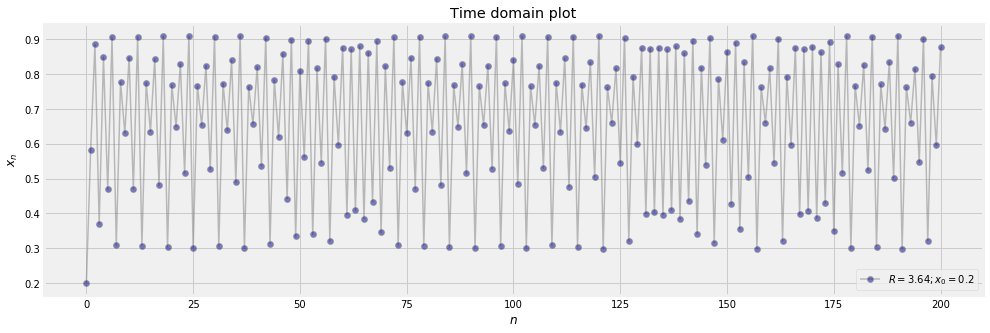

In [137]:
some_other_map = LogisticMap(.2, 3.64, 200)
time_domain_plot(some_other_map)

## Bifurcation diagram

In [19]:
def plot_bifurcation(x0, rs, n_epochs = 100, drop_transient = 5, alpha = .5, markersize = .2):
    
    plt.figure(figsize = (15, 8))
    ax = plt.axes()
    # Setting the background color
#     ax.set_facecolor("white")
    ax.grid(False)
#     ax.set_axis_off()
    
    xs = []
    
    for r in rs:
        x_    = LogisticMap(x0, r, n_epochs).get_data()
        x_    = np.unique(x_[drop_transient:])
        len_x = len(x_)
        plt.plot([r] * len_x, x_, 
                 alpha           = alpha,
                 linestyle       = 'None', 
                 marker          = 'o', 
                 markersize      = markersize,
                 color           = 'darkblue',
                 markerfacecolor = 'darkblue')
        
    plt.title('Bifurcation diagram')
    plt.xlabel('$R$')
    plt.ylabel('$x$')
#     plt.savefig('bifurc_diag4.png', dpi = 300)#, facecolor = 'white')
    plt.show()

In [319]:
# Define params
rs = np.arange(2.8, 4.001, .001)
x0 = .2
n_epochs = int(1e3)
start_at = 500

C:\Users\aleksander.molak\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


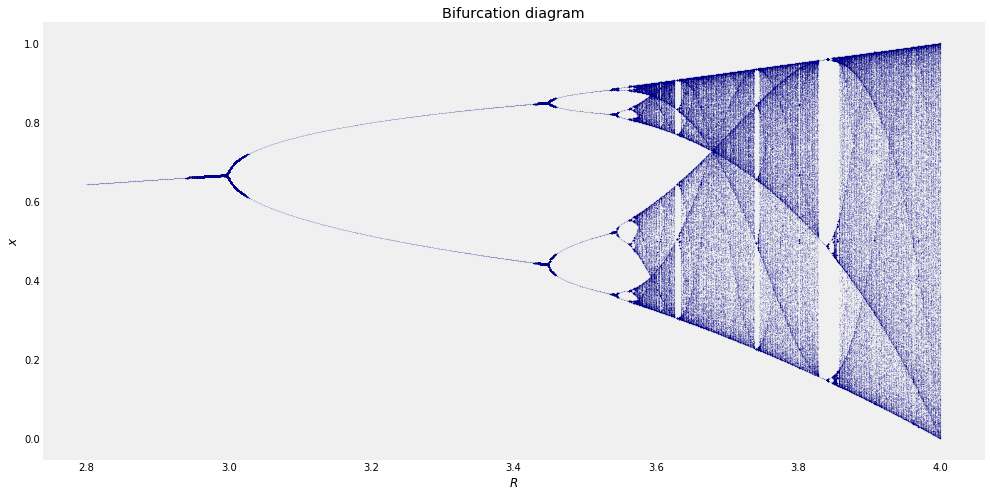

In [320]:
plot_bifurcation(x0, rs, n_epochs, drop_transient = start_at, alpha = .5, markersize = .1)

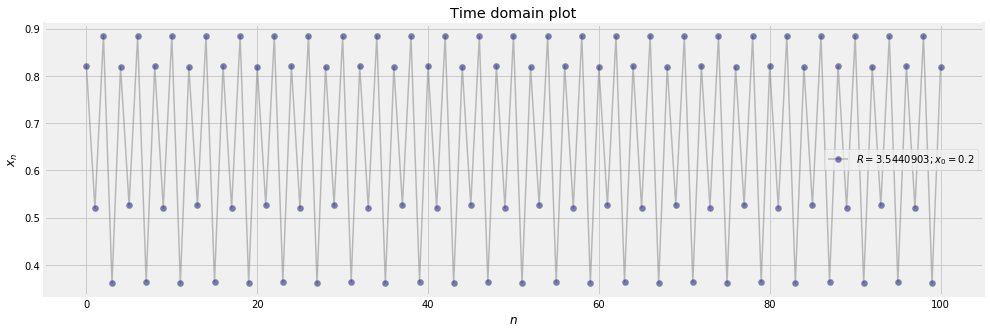

In [42]:
my_map = LogisticMap(.2, 3.5440903, 500)
time_domain_plot(my_map, start = 400)

## Some key terms

### Dissipation

A dissipative process is a process in which energy is transformed from some initial form to some final form. In our context we can say that there's an energy loss in the process.

**Dissipation** is a necessary condition for the system to have an attractor. On the other hand, **chaos** can appear in non-disspiative systems as well.


### Hamiltonian / conservative system

Is **Hamiltonian** or **conservative** systems energy is conserved; they are **non-dissipative**.

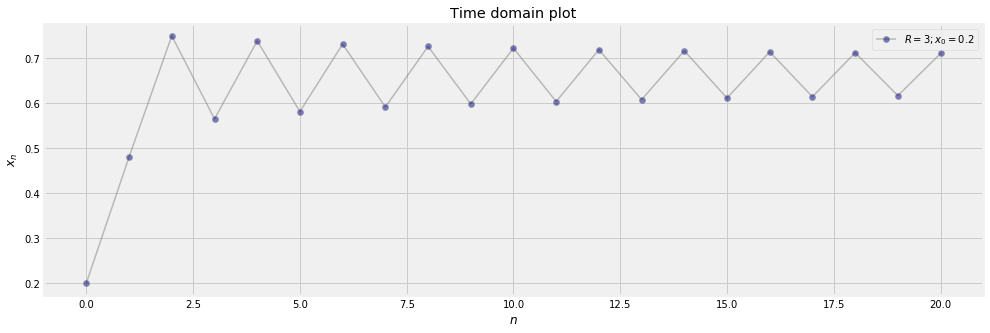

In [17]:
my_map3 = LogisticMap(.2, 3, 20)
time_domain_plot(my_map3, start = 0)

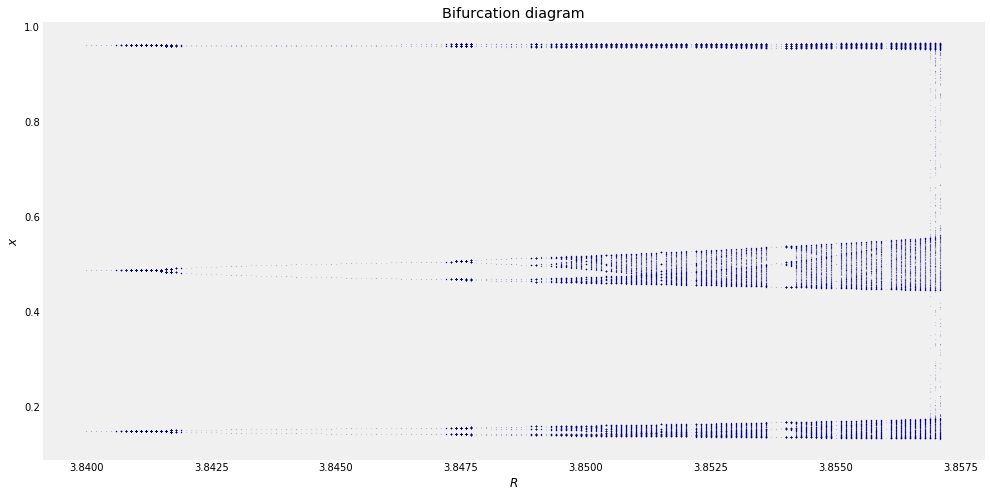

In [34]:
plot_bifurcation(.5, np.arange(3.84, 3.8571, .0001), 2000, drop_transient = 1000, alpha = .5, markersize = .1)